# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv',nrows=50000)
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


## 2. Preprocessing

### 2.1  project_subject_categories

In [4]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [5]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories  
0             Literacy_Language  
1  History_Civics Health_Sports

In [6]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

In [7]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

### 2.2 project_subject_subcategories¶

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [9]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  
0             Literacy_Language                  ESL Literacy  
1  History_Civics Health_Sports  Civics_Government TeamSports

In [10]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

In [11]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


### 2.3 Project Essay

In [12]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [13]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [14]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [15]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [16]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [17]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [18]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [19]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essay = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essay.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:32<00:00, 1526.60it/s]


In [20]:
# after preprocesing
preprocessed_essay[20]

'the students school come diverse backgrounds varied experiences over 90 students come considerable poverty this year 100 students district receive free lunches due poverty rate community some students well grade level need enrichment students limited experiences literacy writing vocabulary need work basic skills these differences within class make difficult ensure students getting specifically need daily basis each week students love visiting school library borrowing book week a new carpet library would create cozy place students sit librarian reading book week this would also help brighten library make exciting place students while librarian the carpet i requested designated spaces students sit helping manage behavior also your donation would provide bright colorful carpet library story area librarians teachers volunteers come share stories students first second grade students sharing books listening stories important child development children need know reading important no better w

In [21]:
len(preprocessed_essay)

50000

In [22]:
project_data['preprocessed_essay']=preprocessed_essay
project_data.drop(['essay'], axis=1, inplace=True)

### 2.4 Project title Text

In [23]:
# printing some project title.
print(project_data['project_title'].values[54])
print("="*50)
print(project_data['project_title'].values[170])
print("="*50)
print(project_data['project_title'].values[1079])
print("="*50)



Swim For Life At YMCA!
Alternative Seating for Comfy Classrooms
Hands on Art : Eric Carle


In [24]:
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title .append(sent.lower().strip())

100%|██████████| 50000/50000 [00:01<00:00, 34590.50it/s]


In [25]:
preprocessed_project_title[170]

'alternative seating comfy classrooms'

In [26]:
project_data['preprocessed_project_title'] = preprocessed_project_title

In [27]:
project_data.drop(['project_title'], axis=1, inplace=True)

### 2.5 Price

In [28]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [29]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [30]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

### 2.6 Number of words in the combine essays

In [31]:
essay_word_count = []
for essay in project_data['preprocessed_essay'] :
    e = len(essay.split())
    essay_word_count.append(e)

In [32]:
project_data['essay_word_count']= essay_word_count 

### 2.7 Number of words in the Project Title

In [33]:
title_word_count = []
for title in project_data['preprocessed_project_title'] :
    e = len(title.split())
    title_word_count.append(e)

In [34]:
project_data['Title_word_count']= title_word_count 

In [35]:
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  ...  \
0  \"The limits of your language are the limits o...             NaN  ...   
1  The projector we need for our school is very c...             NaN  ...   
2  The students on the campus come to school know...             NaN  ...   
3  My students live in high poverty conditions wi...             NaN  ...   
4  For many students, math is a subject that does...             NaN  ...   

  teacher_number_of_previously_posted_projects project_is_approved  \
0                                            0                   0   
1                                            7                   1   
2                                            1                   0   
3                                            4                   1   
4                                            1                   1   

                 clean_categories           clean_subcategories  \
0               Literacy_Language                  ESL Literacy   
1    History_Civics Health_Sports  Civics_Government TeamSports   
2                   Health_Sports    Health_Wellness TeamSports   
3  Literacy_Language Math_Science          Literacy Mathematics   
4                    Math_Science                   Mathematics   

                                  preprocessed_essay  \
0  my students english learners working english s...   
1  our students arrive school eager learn they po...   
2  true champions not always ones win guts by mia...   
3  i work unique school filled esl english second...   
4  our second grade classroom next year made arou...   

                        preprocessed_project_title   price quantity  \
0        educational support english learners home  154.60       23   
1                 wanted projector hungry learners  299.00        1   
2  soccer equipment awesome middle school students  516.85       22   
3                           techie kindergarteners  232.90        4   
4                           interactive math tools   67.98        4   

   essay_word_count  Title_word_count  
0               161                 5  
1               109                 4  
2               202                 6  
3               121                 2  
4               122                 3  

[5 rows x 22 columns]

### 2.8 Computing Sentiment Scores for project Essay

In [36]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/deekshant_khitoliya/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

In [37]:
# Create a SentimentIntensityAnalyzer object.
sid = SentimentIntensityAnalyzer()

In [38]:
#https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/
Negative=[]
Positive=[]
Neutral=[]
compound=[]

# polarity_scores method of SentimentIntensityAnalyzer 
# oject gives a sentiment dictionary. 
# which contains pos, neg, neu, and compound scores. 

for sentence in tqdm(project_data['preprocessed_essay']):
    sentiment_dict = sid.polarity_scores(sentence) 
    a=sentiment_dict['neg']
    b=sentiment_dict['neu']
    c=sentiment_dict['pos']
    d=sentiment_dict['compound']
    
    Negative.append(a)
    Positive.append(c)
    Neutral.append(b)
    compound.append(d)


100%|██████████| 50000/50000 [01:51<00:00, 448.06it/s]


In [39]:
project_data['Negative']=Negative
project_data['Positive']=Positive
project_data['Neutral']=Neutral
project_data['Compound']=compound
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  ...  \
0  \"The limits of your language are the limits o...             NaN  ...   
1  The projector we need for our school is very c...             NaN  ...   
2  The students on the campus come to school know...             NaN  ...   
3  My students live in high poverty conditions wi...             NaN  ...   
4  For many students, math is a subject that does...             NaN  ...   

                                  preprocessed_essay  \
0  my students english learners working english s...   
1  our students arrive school eager learn they po...   
2  true champions not always ones win guts by mia...   
3  i work unique school filled esl english second...   
4  our second grade classroom next year made arou...   

                        preprocessed_project_title   price  quantity  \
0        educational support english learners home  154.60        23   
1                 wanted projector hungry learners  299.00         1   
2  soccer equipment awesome middle school students  516.85        22   
3                           techie kindergarteners  232.90         4   
4                           interactive math tools   67.98         4   

  essay_word_count Title_word_count Negative Positive  Neutral  Compound  
0              161                5    0.012    0.144    0.844    0.9694  
1              109                4    0.048    0.283    0.669    0.9856  
2              202                6    0.122    0.219    0.659    0.9816  
3              121                2    0.106    0.246    0.649    0.9656  
4              122                3    0.066    0.143    0.791    0.8524  

[5 rows x 26 columns]

## 3.1 Splitting data into Train and cross validation(or test): Stratified Sampling

In [40]:
project_data.head(3)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   

                                     project_essay_2 project_essay_3  ...  \
0  \"The limits of your language are the limits o...             NaN  ...   
1  The projector we need for our school is very c...             NaN  ...   
2  The students on the campus come to school know...             NaN  ...   

                                  preprocessed_essay  \
0  my students english learners working english s...   
1  our students arrive school eager learn they po...   
2  true champions not always ones win guts by mia...   

                        preprocessed_project_title   price  quantity  \
0        educational support english learners home  154.60        23   
1                 wanted projector hungry learners  299.00         1   
2  soccer equipment awesome middle school students  516.85        22   

  essay_word_count Title_word_count Negative Positive  Neutral  Compound  
0              161                5    0.012    0.144    0.844    0.9694  
1              109                4    0.048    0.283    0.669    0.9856  
2              202                6    0.122    0.219    0.659    0.9816  

[3 rows x 26 columns]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(project_data,project_data['project_is_approved'],stratify=project_data['project_is_approved'], random_state=32)


In [42]:
X_train.shape

(37500, 26)

In [43]:
y_train.shape

(37500,)

In [44]:
X_test.shape

(12500, 26)

In [45]:
y_test.shape

(12500,)

In [46]:
X_test.shape

(12500, 26)

In [47]:
X_train.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
15711       43429  p169894  39a1994529fa4398f75ce4403a4e201f           Mrs.   
31878        4577  p210531  424819801de22a60bba7d0f4354d0258            Ms.   
15876      104415  p224401  82bb971f746edaf008d15291ff77a445            Ms.   
37141      172689  p244189  b41115c9e8f96a8a27ed3bf921a8a429           Mrs.   
38963       34496  p212133  b75f43506650e3caa34bf9a5cbf483ee           Mrs.   

      school_state project_submitted_datetime project_grade_category  \
15711           SC        2017-01-31 11:09:35             Grades 3-5   
31878           MA        2016-08-21 21:23:38          Grades PreK-2   
15876           CO        2017-04-17 22:11:10          Grades PreK-2   
37141           WA        2016-09-08 00:00:52             Grades 3-5   
38963           UT        2016-08-22 17:08:51             Grades 3-5   

                                         project_essay_1  \
15711  Today's classroom is continually changing.  I ...   
31878  My students are my babies...I want the world f...   
15876  I love Room 113, our school's K-3 autism cente...   
37141  Our students are high-poverty, high-needs, and...   
38963  The students at my school come from various ba...   

                                         project_essay_2 project_essay_3  ...  \
15711  We have transitioned to a flexible seating cla...             NaN  ...   
31878  My Project\r\n\r\nBudget cuts are everywhere, ...             NaN  ...   
15876  More and more learning is done online. Forget ...             NaN  ...   
37141  Learning to play piano builds many different t...             NaN  ...   
38963  Coming back to school is difficult for many st...             NaN  ...   

                                      preprocessed_essay  \
15711  today classroom continually changing i work la...   
31878  my students babies i want world i teach three ...   
15876  i love room 113 school k 3 autism center when ...   
37141  our students high poverty high needs highly ca...   
38963  the students school come various backgrounds t...   

                   preprocessed_project_title   price  quantity  \
15711          refresh our flexible classroom  112.75        18   
31878  please help with basic school supplies  101.47        15   
15876      set us free with little technology  429.00         2   
37141      two piano keyboards young learners  299.99         2   
38963              help our plates be healthy  345.25        15   

      essay_word_count Title_word_count Negative Positive  Neutral  Compound  
15711              165                4    0.033    0.371    0.595    0.9969  
31878              125                6    0.071    0.229    0.700    0.9635  
15876              170                6    0.093    0.178    0.730    0.9296  
37141              125                5    0.031    0.380    0.589    0.9939  
38963              157                5    0.072    0.278    0.650    0.9872  

[5 rows x 26 columns]

## 4 Make Data Model Ready: encoding numerical, categorical features

### 4.1 Vectorizing Numerical features

##### A. Price

In [48]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean : {}".format(price_scalar.mean_[0]))
print("Standard deviation :{}".format(np.sqrt(price_scalar.var_[0])))

# Now standardize the data with above maen and variance.
price_standardized_train_data = price_scalar.transform(X_train['price'].values.reshape(-1, 1))

Mean : 299.1888226666667
Standard deviation :375.41611545821604


In [49]:
price_standardized_test_data = price_scalar.transform(X_test['price'].values.reshape(-1, 1))

##### B . Number of Previously Proposed Projects by the Teacher

In [50]:
previous_projects = StandardScaler()
previous_projects.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

print("Mean : {}".format(previous_projects.mean_[0]))
print("Standard deviation :{}".format(np.sqrt(previous_projects.var_[0])))

previous_projects_standardized_train_data = previous_projects.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))



Mean : 11.268453333333333
Standard deviation :28.29868335231321


In [51]:
previous_projects_standardized_test_data = previous_projects.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))


##### C. Quantity

In [52]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

quantity_scalar = StandardScaler()
quantity_scalar.fit(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean : {}".format(quantity_scalar.mean_[0]))
print("Standard deviation :{}".format(np.sqrt(quantity_scalar.var_[0])))

# Now standardize the data with above maen and variance.
quantity_standardized_train_data = quantity_scalar.transform(X_train['quantity'].values.reshape(-1, 1))

Mean : 17.064533333333333
Standard deviation :26.97188947989287


In [53]:
quantity_standardized_test_data = quantity_scalar.transform(X_test['quantity'].values.reshape(-1, 1))

##### D. Title Word Count Feature

In [54]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

Title_Word_Count_scalar = StandardScaler()
Title_Word_Count_scalar.fit(X_train['Title_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean : {}".format(Title_Word_Count_scalar.mean_[0]))
print("Standard deviation :{}".format(np.sqrt(Title_Word_Count_scalar.var_[0])))

# Now standardize the data with above maen and variance.
Title_Word_Count_train_data = Title_Word_Count_scalar.transform(X_train['Title_word_count'].values.reshape(-1, 1))
Title_Word_Count_test_data = Title_Word_Count_scalar.transform(X_test['Title_word_count'].values.reshape(-1, 1))

Mean : 4.337893333333334
Standard deviation :1.7822349532601538


##### E. Essay Word Count Feature

In [55]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

essay_Word_Count_scalar = StandardScaler()
essay_Word_Count_scalar.fit(X_train['essay_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean : {}".format(essay_Word_Count_scalar.mean_[0]))
print("Standard deviation :{}".format(np.sqrt(essay_Word_Count_scalar.var_[0])))

# Now standardize the data with above maen and variance.
Essay_Word_Count_train_data = Title_Word_Count_scalar.transform(X_train['essay_word_count'].values.reshape(-1, 1))
Essay_Word_Count_test_data = Title_Word_Count_scalar.transform(X_test['essay_word_count'].values.reshape(-1, 1))

Mean : 151.13178666666667
Standard deviation :38.761228295052206


##### F. Essay Sentiments - positives

In [56]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

positive_scalar = StandardScaler()
positive_scalar.fit(X_train['Positive'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean : {}".format(positive_scalar.mean_[0]))
print("Standard deviation :{}".format(np.sqrt(positive_scalar .var_[0])))

# Now standardize the data with above maen and variance.
positive_score_train_data = Title_Word_Count_scalar.transform(X_train['Positive'].values.reshape(-1, 1))
positive_score_test_data = Title_Word_Count_scalar.transform(X_test['Positive'].values.reshape(-1, 1))

Mean : 0.26734040000000003
Standard deviation :0.07413162632219351


##### G. Essay Sentiments - negatives

In [57]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

negatives_scalar = StandardScaler()
negatives_scalar.fit(X_train['Negative'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean : {}".format(negatives_scalar.mean_[0]))
print("Standard deviation :{}".format(np.sqrt(negatives_scalar .var_[0])))

# Now standardize the data with above maen and variance.
negative_score_train_data = Title_Word_Count_scalar.transform(X_train['Negative'].values.reshape(-1, 1))
negative_score_test_data = Title_Word_Count_scalar.transform(X_test['Negative'].values.reshape(-1, 1))

Mean : 0.044986960000000006
Standard deviation :0.03385028473477094


##### H. Essay Sentiments - neutrals

In [58]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

neutrals_scalar = StandardScaler()
neutrals_scalar.fit(X_train['Neutral'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean : {}".format(neutrals_scalar.mean_[0]))
print("Standard deviation :{}".format(np.sqrt(neutrals_scalar .var_[0])))

# Now standardize the data with above maen and variance.
neutral_score_train_data = Title_Word_Count_scalar.transform(X_train['Neutral'].values.reshape(-1, 1))
neutral_score_test_data = Title_Word_Count_scalar.transform(X_test['Neutral'].values.reshape(-1, 1))

Mean : 0.6876722399999999
Standard deviation :0.07238796557473533


##### I Essay Sentiments - compound

In [59]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

Compound_scalar = StandardScaler()
Compound_scalar.fit(X_train['Compound'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean : {}".format(Compound_scalar.mean_[0]))
print("Standard deviation :{}".format(np.sqrt(Compound_scalar .var_[0])))

# Now standardize the data with above maen and variance.
Compound_score_train_data = Title_Word_Count_scalar.transform(X_train['Compound'].values.reshape(-1, 1))
Compound_score_test_data = Title_Word_Count_scalar.transform(X_test['Compound'].values.reshape(-1, 1))

Mean : 0.9591411813333334
Standard deviation :0.1536895207508668


### 4.2  Vectorizing Categorical data

#### A. Project Categories

##### Let us Do Response Coding of Categorical Features instead of One Hot Encoding to reduce our dimensions

#### Function that returns Probability of a given feature belonging to Positive Class(Project is Approved)

In [60]:
def pos_probability_ratio(x):
    probability_eq_1 = np.mean(x)
    #probability_eq_0 = 1.0 - probability_eq_1
    return probability_eq_1 
# Calculate the probability ratio encoding
prob_ratios_pclass = X_train[['project_is_approved']].groupby(X_train['clean_categories']).apply(lambda x: pos_probability_ratio(x))
prob_ratios_pclass.columns = ['Pos Prob  Encoding']
prob_ratios_pclass

Pos Prob  Encoding
clean_categories                                        
AppliedLearning                                 0.814059
AppliedLearning Health_Sports                   0.857143
AppliedLearning History_Civics                  0.807692
AppliedLearning Literacy_Language               0.850000
AppliedLearning Math_Science                    0.809117
AppliedLearning Music_Arts                      0.819923
AppliedLearning SpecialNeeds                    0.817097
AppliedLearning Warmth Care_Hunger              0.714286
Health_Sports                                   0.846110
Health_Sports AppliedLearning                   0.807692
Health_Sports History_Civics                    0.904762
Health_Sports Literacy_Language                 0.814815
Health_Sports Math_Science                      0.721649
Health_Sports Music_Arts                        0.759259
Health_Sports SpecialNeeds                      0.855292
Health_Sports Warmth Care_Hunger                0.916667
History_Civics                                  0.822430
History_Civics AppliedLearning                  0.700000
History_Civics Health_Sports                    1.000000
History_Civics Literacy_Language                0.918919
History_Civics Math_Science                     0.868217
History_Civics Music_Arts                       0.887850
History_Civics SpecialNeeds                     0.766234
Literacy_Language                               0.861453
Literacy_Language AppliedLearning               0.850962
Literacy_Language Health_Sports                 0.800000
Literacy_Language History_Civics                0.880150
Literacy_Language Math_Science                  0.862143
Literacy_Language Music_Arts                    0.829146
Literacy_Language SpecialNeeds                  0.845867
Literacy_Language Warmth Care_Hunger            1.000000
Math_Science                                    0.822859
Math_Science AppliedLearning                    0.833333
Math_Science Health_Sports                      0.787671
Math_Science History_Civics                     0.844660
Math_Science Literacy_Language                  0.885714
Math_Science Music_Arts                         0.837456
Math_Science SpecialNeeds                       0.827856
Math_Science Warmth Care_Hunger                 1.000000
Music_Arts                                      0.856335
Music_Arts AppliedLearning                      0.500000
Music_Arts Health_Sports                        0.750000
Music_Arts History_Civics                       0.555556
Music_Arts SpecialNeeds                         0.920000
SpecialNeeds                                    0.808200
SpecialNeeds Health_Sports                      0.714286
SpecialNeeds Music_Arts                         0.822917
SpecialNeeds Warmth Care_Hunger                 0.750000
Warmth Care_Hunger                              0.916484

#### Function that returns Probability of a given feature belonging to Negative Class(Project is Not Approved)

In [61]:
def neg_probability_ratio(x):
    probability_eq_1 = np.mean(x)
    probability_eq_0 = 1.0 - probability_eq_1
    return probability_eq_0
# Calculate the probability ratio encoding
prob_ratios_nclass = X_train[['project_is_approved']].groupby(X_train['clean_categories']).apply(lambda x: neg_probability_ratio(x))
prob_ratios_nclass.columns = ['Neg Prob  Encoding']
prob_ratios_nclass

Neg Prob  Encoding
clean_categories                                        
AppliedLearning                                 0.185941
AppliedLearning Health_Sports                   0.142857
AppliedLearning History_Civics                  0.192308
AppliedLearning Literacy_Language               0.150000
AppliedLearning Math_Science                    0.190883
AppliedLearning Music_Arts                      0.180077
AppliedLearning SpecialNeeds                    0.182903
AppliedLearning Warmth Care_Hunger              0.285714
Health_Sports                                   0.153890
Health_Sports AppliedLearning                   0.192308
Health_Sports History_Civics                    0.095238
Health_Sports Literacy_Language                 0.185185
Health_Sports Math_Science                      0.278351
Health_Sports Music_Arts                        0.240741
Health_Sports SpecialNeeds                      0.144708
Health_Sports Warmth Care_Hunger                0.083333
History_Civics                                  0.177570
History_Civics AppliedLearning                  0.300000
History_Civics Health_Sports                    0.000000
History_Civics Literacy_Language                0.081081
History_Civics Math_Science                     0.131783
History_Civics Music_Arts                       0.112150
History_Civics SpecialNeeds                     0.233766
Literacy_Language                               0.138547
Literacy_Language AppliedLearning               0.149038
Literacy_Language Health_Sports                 0.200000
Literacy_Language History_Civics                0.119850
Literacy_Language Math_Science                  0.137857
Literacy_Language Music_Arts                    0.170854
Literacy_Language SpecialNeeds                  0.154133
Literacy_Language Warmth Care_Hunger            0.000000
Math_Science                                    0.177141
Math_Science AppliedLearning                    0.166667
Math_Science Health_Sports                      0.212329
Math_Science History_Civics                     0.155340
Math_Science Literacy_Language                  0.114286
Math_Science Music_Arts                         0.162544
Math_Science SpecialNeeds                       0.172144
Math_Science Warmth Care_Hunger                 0.000000
Music_Arts                                      0.143665
Music_Arts AppliedLearning                      0.500000
Music_Arts Health_Sports                        0.250000
Music_Arts History_Civics                       0.444444
Music_Arts SpecialNeeds                         0.080000
SpecialNeeds                                    0.191800
SpecialNeeds Health_Sports                      0.285714
SpecialNeeds Music_Arts                         0.177083
SpecialNeeds Warmth Care_Hunger                 0.250000
Warmth Care_Hunger                              0.083516

#### Merging Positive and Negative Probabilities into a data Frame for all unique values in a category

In [62]:
clean_cat_encoding = pd.merge(prob_ratios_pclass,prob_ratios_nclass, on='clean_categories')
print(clean_cat_encoding)

                                      Pos Prob  Encoding  Neg Prob  Encoding
clean_categories                                                            
AppliedLearning                                 0.814059            0.185941
AppliedLearning Health_Sports                   0.857143            0.142857
AppliedLearning History_Civics                  0.807692            0.192308
AppliedLearning Literacy_Language               0.850000            0.150000
AppliedLearning Math_Science                    0.809117            0.190883
AppliedLearning Music_Arts                      0.819923            0.180077
AppliedLearning SpecialNeeds                    0.817097            0.182903
AppliedLearning Warmth Care_Hunger              0.714286            0.285714
Health_Sports                                   0.846110            0.153890
Health_Sports AppliedLearning                   0.807692            0.192308
Health_Sports History_Civics                    0.904762            0.095238

In [63]:
clean_cat_encoding.columns

Index(['Pos Prob  Encoding', 'Neg Prob  Encoding'], dtype='object')

In [66]:
sorted_alphabetically= sorted(X_train['clean_categories'].unique())

#### Converting Data Frame into Dictionary where Keys denote all unique values in a Category and values denotes respective probabilities

In [67]:
 # encoded_Prob :  which contains the probability array for all unique values in a category
encoded_Prob_1 = dict(zip(sorted_alphabetically,clean_cat_encoding['Pos Prob  Encoding'])) 
encoded_Prob_2 = dict(zip(sorted_alphabetically,clean_cat_encoding['Neg Prob  Encoding']))
#return encoded_Prob
encoded_Prob= {key: [value , encoded_Prob_2[key]]  for key, value in encoded_Prob_1.items()}

In [68]:
encoded_Prob

{'AppliedLearning': [0.8140589569160998, 0.18594104308390025],
 'AppliedLearning Health_Sports': [0.8571428571428571, 0.1428571428571429],
 'AppliedLearning History_Civics': [0.8076923076923077, 0.1923076923076923],
 'AppliedLearning Literacy_Language': [0.85, 0.15000000000000002],
 'AppliedLearning Math_Science': [0.8091168091168092, 0.19088319088319083],
 'AppliedLearning Music_Arts': [0.8199233716475096, 0.1800766283524904],
 'AppliedLearning SpecialNeeds': [0.8170974155069582, 0.18290258449304175],
 'AppliedLearning Warmth Care_Hunger': [0.7142857142857143,
  0.2857142857142857],
 'Health_Sports': [0.8461098398169337, 0.15389016018306634],
 'Health_Sports AppliedLearning': [0.8076923076923077, 0.1923076923076923],
 'Health_Sports History_Civics': [0.9047619047619048, 0.09523809523809523],
 'Health_Sports Literacy_Language': [0.8148148148148148, 0.18518518518518523],
 'Health_Sports Math_Science': [0.7216494845360825, 0.27835051546391754],
 'Health_Sports Music_Arts': [0.75925925925

In [69]:
#gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
def Response_Encoding (df,feature):
    gv_fea = []
     # value_count is similar in get_gv_fea_dict

    value_count = X_train[feature].value_counts()
 # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
 # if not we will add [1/2,1/2] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(encoded_Prob[row[feature]])
        else:
            gv_fea.append([1/2,1/2])
#
    return gv_fea

In [70]:
#response-coding of the  feature

# train gene feature
cat_train_feature_responseCoding = np.array(Response_Encoding( X_train,'clean_categories' ))
# test gene feature
cat_test_feature_responseCoding = np.array(Response_Encoding( X_test, 'clean_categories'))


In [71]:
print("cat_train_feature_responseCoding is converted feature using respone coding method. The shape of the feature:", cat_train_feature_responseCoding.shape)

cat_train_feature_responseCoding is converted feature using respone coding method. The shape of the feature: (37500, 2)


### Now Let us Write a proper function For Doing Response Coding

In [72]:
def get_feature_dictionary(feature):

    def pos_probability_ratio(x):
         probability_eq_1 = np.mean(x)
         #probability_eq_0 = 1.0 - probability_eq_1
         return probability_eq_1 
          # Calculate the probability ratio encoding
    prob_ratios_pclass = X_train[['project_is_approved']].groupby(X_train[feature]).apply(lambda x: pos_probability_ratio(x))
    prob_ratios_pclass.columns = ['Pos Prob  Encoding']



    def neg_probability_ratio(x):
        probability_eq_1 = np.mean(x)
        probability_eq_0 = 1.0 - probability_eq_1
        return probability_eq_0

    # Calculate the probability ratio encoding
    prob_ratios_nclass = X_train[['project_is_approved']].groupby(X_train[feature]).apply(lambda x: neg_probability_ratio(x))
    prob_ratios_nclass.columns = ['Neg Prob  Encoding']

    clean_cat_encoding = pd.merge(prob_ratios_pclass,prob_ratios_nclass, on=feature)
    sorted_alphabetically= sorted(X_train[feature].unique())

    encoded_Prob_1 = dict(zip(sorted_alphabetically,clean_cat_encoding['Pos Prob  Encoding'])) 
    encoded_Prob_2 = dict(zip(sorted_alphabetically,clean_cat_encoding['Neg Prob  Encoding']))
         #return encoded_Prob
    encoded_Prob = {key: [value , encoded_Prob_2[key]]  for key, value in encoded_Prob_1.items()}

    return encoded_Prob

#gv_fea:  it will contain the feature for each feature value in the data
def Response_Encoding (df,feature):
    gv_fea = []
     #Dict, which contains the probability array for each unique value in a category
    encoded_Prob = get_feature_dictionary(feature)
    value_count = X_train[feature].value_counts()
  
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(encoded_Prob[row[feature]])
        else:
            gv_fea.append([1/2,1/2])
#
    return gv_fea

#### B. Project Sub-Categories¶

In [73]:
#response-coding of the  feature

# train gene feature
sub_categories_train_feature_responseCoding = np.array(Response_Encoding( X_train,'clean_subcategories' ))
# test gene feature
sub_categories_test_feature_responseCoding = np.array(Response_Encoding( X_test, 'clean_subcategories'))

In [74]:
print("sub_categories_train_feature_responseCoding is converted feature using respone coding method. The shape of the feature:", sub_categories_train_feature_responseCoding.shape)

sub_categories_train_feature_responseCoding is converted feature using respone coding method. The shape of the feature: (37500, 2)


#### C. School State

In [75]:
#response-coding of the  feature

# train gene feature
school_state_train_feature_responseCoding = np.array(Response_Encoding( X_train,'school_state' ))
# test gene feature
school_state_test_feature_responseCoding = np.array(Response_Encoding( X_test, 'school_state'))

In [76]:
print("school_state_train_feature_responseCoding is converted feature using respone coding method. The shape of the feature:", school_state_train_feature_responseCoding.shape)

school_state_train_feature_responseCoding is converted feature using respone coding method. The shape of the feature: (37500, 2)


#### D. Project Grade Category

In [77]:
#response-coding of the  feature

# train gene feature
project_grade_category_train_feature_responseCoding = np.array(Response_Encoding( X_train,'project_grade_category' ))
# test gene feature
project_grade_category_test_feature_responseCoding = np.array(Response_Encoding( X_test, 'project_grade_category'))

In [78]:
print("project_grade_category_train_feature_responseCoding is converted feature using respone coding method. The shape of the feature:", project_grade_category_train_feature_responseCoding.shape)

project_grade_category_train_feature_responseCoding is converted feature using respone coding method. The shape of the feature: (37500, 2)


#### E. Teacher Prefix

In [79]:
#response-coding of the  feature

# train gene feature
teacher_prefix_category_train_feature_responseCoding = np.array(Response_Encoding( X_train,'teacher_prefix' ))
# test gene feature
teacher_prefix_category_test_feature_responseCoding = np.array(Response_Encoding( X_test, 'teacher_prefix'))

In [80]:
print("teacher_prefix_category_train_feature_responseCoding is converted feature using respone coding method. The shape of the feature:", teacher_prefix_category_train_feature_responseCoding.shape)

teacher_prefix_category_train_feature_responseCoding is converted feature using respone coding method. The shape of the feature: (37500, 2)


## 4.3 Vectorizing Text data

### 4.3.1  Bag of words on preprocessed essays  with bi-grams with min_df=10 and max_features=5000

In [81]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(ngram_range=(2,2), min_df=10, max_features = 5000)
preprocessed_essays_train_bow = vectorizer.fit_transform(X_train['preprocessed_essay'])
print("Shape of matrix after one hot encodig ",preprocessed_essays_train_bow.shape)
print("the type of count vectorizer ",type(preprocessed_essays_train_bow))
print("the number of unique words ", preprocessed_essays_train_bow.get_shape()[1])

Shape of matrix after one hot encodig  (37500, 5000)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the number of unique words  5000


In [82]:
preprocessed_essays_test_bow = vectorizer.transform(X_test['preprocessed_essay'])
print("Shape of matrix after one hot encodig ",preprocessed_essays_test_bow.shape)
print("the type of count vectorizer ",type(preprocessed_essays_test_bow))
print("the number of unique words ", preprocessed_essays_test_bow.get_shape()[1])


Shape of matrix after one hot encodig  (12500, 5000)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the number of unique words  5000


### 4.3.2 Bag of Words on project_title with  min_df=10 

In [83]:
# We are considering only the words which appeared in at least 5 project title.
vectorizer = CountVectorizer( min_df=10)
preprocessed_project_title_train_bow = vectorizer.fit_transform(X_train['preprocessed_project_title'])
print("Shape of matrix after one hot encodig ",preprocessed_project_title_train_bow.shape)
print("the type of count vectorizer ",type(preprocessed_project_title_train_bow))
print("the number of unique words ", preprocessed_project_title_train_bow.get_shape()[1])

Shape of matrix after one hot encodig  (37500, 1772)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the number of unique words  1772


In [84]:
preprocessed_project_title_test_bow = vectorizer.transform(X_test['preprocessed_project_title'])
print("Shape of matrix after one hot encodig ",preprocessed_project_title_test_bow.shape)
print("the type of count vectorizer ",type(preprocessed_project_title_test_bow))
print("the number of unique words ", preprocessed_project_title_test_bow.get_shape()[1])

Shape of matrix after one hot encodig  (12500, 1772)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the number of unique words  1772


### 4.3.3TFIDF vectorizer preprocessed essays with bi-grams with min_df=10 and max_features=5000

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2), min_df=10, max_features = 5000)
essay_tfidf_train = vectorizer.fit_transform(X_train['preprocessed_essay'])
print("Shape of matrix after one hot encodig ",essay_tfidf_train.shape)
print("the number of unique words ", essay_tfidf_train.get_shape()[1])

Shape of matrix after one hot encodig  (37500, 5000)
the number of unique words  5000


In [86]:
essay_tfidf_test = vectorizer.transform(X_test['preprocessed_essay'])
print("Shape of matrix after one hot encodig ",essay_tfidf_test.shape)
print("the number of unique words ", essay_tfidf_test.get_shape()[1])

Shape of matrix after one hot encodig  (12500, 5000)
the number of unique words  5000


### 4.3.4 TFIDF Vectorizer on project_title   with min_df=10 

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( min_df=10)
project_title_tfidf_train = vectorizer.fit_transform(X_train['preprocessed_project_title'])
print("Shape of matrix after one hot encodig ",project_title_tfidf_train.shape)
print("the number of unique words ", project_title_tfidf_train.get_shape()[1])

Shape of matrix after one hot encodig  (37500, 1772)
the number of unique words  1772


In [88]:
project_title_tfidf_test = vectorizer.transform(X_test['preprocessed_project_title'])
print("Shape of matrix after one hot encodig ",project_title_tfidf_test.shape)
print("the number of unique words ", project_title_tfidf_test.get_shape()[1])

Shape of matrix after one hot encodig  (12500, 1772)
the number of unique words  1772


### 4.3.5 Using Pretrained Model AVG W2V on  essays

In [89]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [90]:
# average Word2Vec on TRAIN DATA
# compute average word2vec for each review.
sent_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split():
        try: # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        except ValueError:
            continue
  
    if cnt_words != 0:
        vector /= cnt_words
    sent_vectors_train.append(vector)

print(len(sent_vectors_train))
print(len(sent_vectors_train[0]))

100%|██████████| 37500/37500 [00:13<00:00, 2821.44it/s]

37500
300


In [91]:
# average Word2Vec on Test DATA
# compute average word2vec for each review.
sent_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split():
        try: # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        except ValueError:
            continue
  
    if cnt_words != 0:
        vector /= cnt_words
    sent_vectors_test.append(vector)

print(len(sent_vectors_test))
print(len(sent_vectors_test[0]))

100%|██████████| 12500/12500 [00:04<00:00, 2786.02it/s]

12500
300


### 4.3.6 Training my own AVG W2V on project_title

In [92]:
# average Word2Vec on Train DATA
# compute average word2vec for each review.
title_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split():
        try: # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        except ValueError:
            continue
  
    if cnt_words != 0:
        vector /= cnt_words
    title_vectors_train.append(vector)

print(len(title_vectors_train))
print(len(title_vectors_train[0]))

100%|██████████| 37500/37500 [00:00<00:00, 56082.14it/s]

37500
300


In [93]:
# average Word2Vec on Test DATA
# compute average word2vec for each review.
title_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split():
        try: # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        except ValueError:
            continue
  
    if cnt_words != 0:
        vector /= cnt_words
    title_vectors_test.append(vector)

print(len(title_vectors_test))
print(len(title_vectors_test[0]))

100%|██████████| 12500/12500 [00:00<00:00, 55184.20it/s]

12500
300


### 4.3.7 Using Pre-Trained TFIDF weighted W2v on Project Essays

In [94]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [95]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        try:    
            
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        except ValueError:
            continue
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_train.append(vector)

print(len(tfidf_w2v_essay_train))
print(len(tfidf_w2v_essay_train[0]))

100%|██████████| 37500/37500 [01:16<00:00, 488.71it/s]

37500
300


In [96]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        try:    
            
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        except ValueError:
            continue
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_test.append(vector)

print(len(tfidf_w2v_essay_test))
print(len(tfidf_w2v_essay_test[0]))

100%|██████████| 12500/12500 [00:25<00:00, 486.45it/s]

12500
300


### 4.3.8 Training my own TFIDF weighted W2v on Project Title

In [97]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [98]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        try:    
            
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        except ValueError:
            continue
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_train.append(vector)

print(len(tfidf_w2v_title_train))
print(len(tfidf_w2v_title_train[0]))

100%|██████████| 37500/37500 [00:01<00:00, 25114.52it/s]

37500
300


In [99]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_title_test= []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        try:    
            
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        except ValueError:
            continue
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_test.append(vector)

print(len(tfidf_w2v_title_test))
print(len(tfidf_w2v_title_test[0]))

100%|██████████| 12500/12500 [00:00<00:00, 23731.32it/s]

12500
300


# Assignment 9: RF and GBDT

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

### Task 1

# Random Forest

## 9.1.1  Applying Random Forests on BOW

In [100]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

In [101]:
bow_train=hstack ((price_standardized_train_data,previous_projects_standardized_train_data, quantity_standardized_train_data, Title_Word_Count_train_data, Essay_Word_Count_train_data, positive_score_train_data, negative_score_train_data, neutral_score_train_data, Compound_score_train_data,  cat_train_feature_responseCoding, sub_categories_train_feature_responseCoding, school_state_train_feature_responseCoding, project_grade_category_train_feature_responseCoding, teacher_prefix_category_train_feature_responseCoding, preprocessed_essays_train_bow, preprocessed_project_title_train_bow))

bow_train=bow_train.tocsr()

In [102]:
bow_test=hstack((price_standardized_test_data,previous_projects_standardized_test_data, quantity_standardized_test_data, Title_Word_Count_test_data, Essay_Word_Count_test_data, positive_score_test_data,  negative_score_test_data, neutral_score_test_data, Compound_score_test_data, cat_test_feature_responseCoding, sub_categories_test_feature_responseCoding,  school_state_test_feature_responseCoding, project_grade_category_test_feature_responseCoding,  teacher_prefix_category_test_feature_responseCoding, preprocessed_essays_test_bow, preprocessed_project_title_test_bow))

bow_test=bow_test.tocsr()

In [103]:
print("Final Shape of the Data matrix")
print(bow_train.shape, y_train.shape)

print(bow_test.shape, y_test.shape)

Final Shape of the Data matrix
(37500, 6791) (37500,)
(12500, 6791) (12500,)


### A. Find the best hyper parameter which results in the maximum AUC value using Grid Search CV

-- Grid Parameter Search via 3-fold CV
{'max_depth': 50, 'n_estimators': 250}


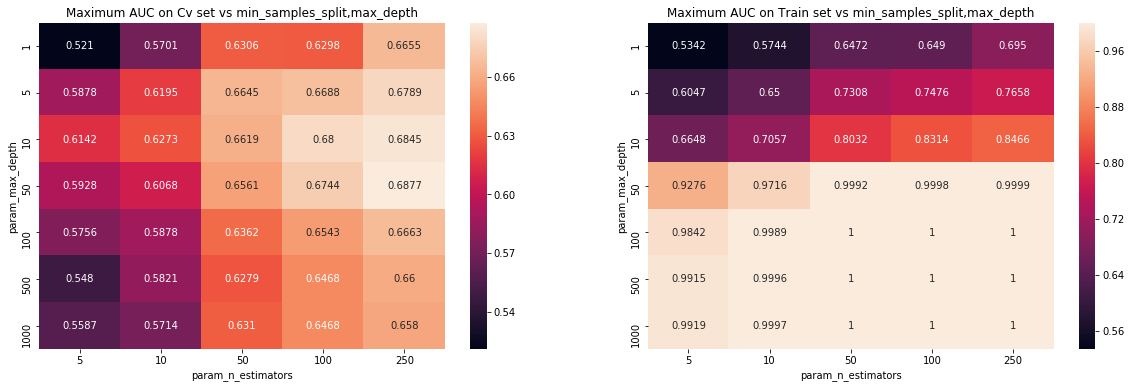

In [102]:
# https://stackoverflow.com/questions/19018333/gridsearchcv-on-logisticregression-in-scikit-learn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("-- Grid Parameter Search via 3-fold CV")

# set of parameters to test
param_grid = {
              'max_depth': [1, 5, 10, 50, 100, 500, 1000],
              'n_estimators': [5, 10, 50, 100, 250]
              
              }

dt = RandomForestClassifier()
clf = GridSearchCV( dt, param_grid, cv=3,scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(bow_train,y_train)

print(clf.best_params_)


train_auc= clf.cv_results_['mean_train_score']
#train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
#cv_auc_std= clf.cv_results_['std_test_score']

#reference:https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
df_gridsearch = pd.DataFrame(clf.cv_results_)
max_scores = df_gridsearch.groupby([ 'param_max_depth','param_n_estimators']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title("Maximum AUC on Cv set vs min_samples_split,max_depth")


plt.subplot(1, 2, 2)
sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title("Maximum AUC on Train set vs min_samples_split,max_depth")
plt.show()



### Observation

### B. Train model using the best hyper-parameter value

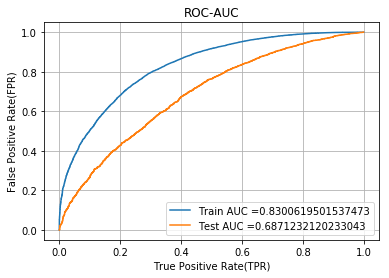

In [104]:
 #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

model = RandomForestClassifier(max_depth = 10, n_estimators = 250)

model.fit(bow_train,y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_scores = model.predict_proba(bow_train)[:,1]
y_test_scores= model.predict_proba(bow_test)[:,1]
y_test_pred= model.predict(bow_test)



train_fpr, train_tpr, train_threshold = roc_curve(y_train,y_train_scores)
test_fpr, test_tpr, test_threshold = roc_curve(y_test, y_test_scores)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC-AUC")
plt.grid()
plt.show()

### c) Confusion Matrix

#### Train Data

In [105]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        #value Error-The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
        #http://justinbois.github.io/bootcamp/2016/lessons/l19_numpy_arrays.html
        if (i>=t).any():
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [106]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_scores,train_threshold, train_fpr,train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.559546596688198 for threshold 0.841
[[ 4166  1620]
 [ 7068 24646]]


the maximum value of tpr*(1-fpr) 0.559546596688198 for threshold 0.841


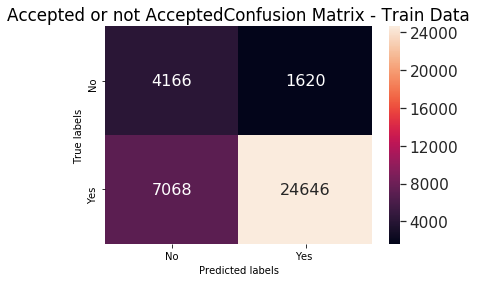

In [107]:
#http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Train Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);


plt.show()

#### Test Data

In [108]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4040993648767668 for threshold 0.849
[[1410  518]
 [5208 5364]]


the maximum value of tpr*(1-fpr) 0.4040993648767668 for threshold 0.849


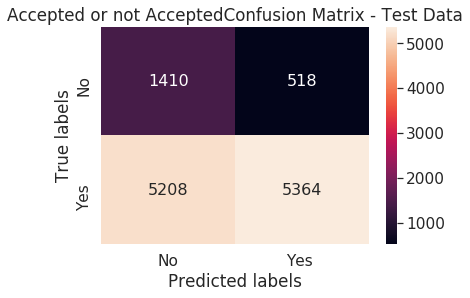

In [109]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Test Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);

## 9.1.2  Applying Random Forests on TFIDF

In [110]:
tfidf_train=hstack ((price_standardized_train_data,previous_projects_standardized_train_data, quantity_standardized_train_data, Title_Word_Count_train_data, Essay_Word_Count_train_data, positive_score_train_data, negative_score_train_data, neutral_score_train_data, Compound_score_train_data,  cat_train_feature_responseCoding, sub_categories_train_feature_responseCoding, school_state_train_feature_responseCoding, project_grade_category_train_feature_responseCoding, teacher_prefix_category_train_feature_responseCoding, essay_tfidf_train,project_title_tfidf_train))
tfidf_train= tfidf_train.tocsr()

In [111]:
tfidf_test =hstack((price_standardized_test_data,previous_projects_standardized_test_data, quantity_standardized_test_data, Title_Word_Count_test_data, Essay_Word_Count_test_data, positive_score_test_data,  negative_score_test_data, neutral_score_test_data, Compound_score_test_data, cat_test_feature_responseCoding, sub_categories_test_feature_responseCoding,  school_state_test_feature_responseCoding, project_grade_category_test_feature_responseCoding,  teacher_prefix_category_test_feature_responseCoding, essay_tfidf_test, project_title_tfidf_test))

tfidf_test = tfidf_test.tocsr()	

In [112]:
print("Final Shape of the Data matrix")
print(tfidf_train.shape, y_train.shape)

print(tfidf_test.shape, y_test.shape)

Final Shape of the Data matrix
(37500, 6791) (37500,)
(12500, 6791) (12500,)


### A. Find the best hyper parameter which results in the maximum AUC value using GridSearchCV

-- Grid Parameter Search via 3-fold CV
{'max_depth': 50, 'n_estimators': 250}


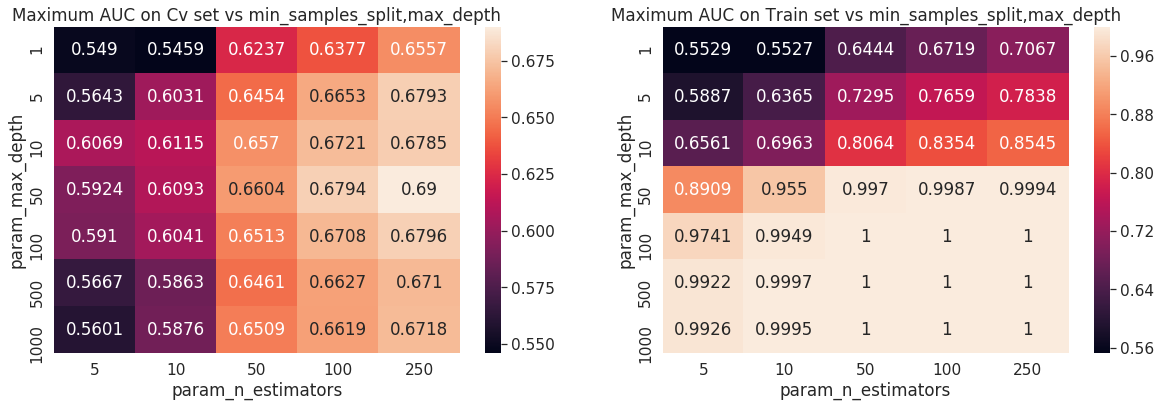

In [112]:
# https://stackoverflow.com/questions/19018333/gridsearchcv-on-logisticregression-in-scikit-learn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("-- Grid Parameter Search via 3-fold CV")

# set of parameters to test
param_grid = {
              'max_depth': [1, 5, 10, 50, 100, 500, 1000],
              'n_estimators': [5, 10, 50, 100, 250]
              
              }

dt = RandomForestClassifier()
clf = GridSearchCV( dt, param_grid, cv=3,scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(tfidf_train,y_train)

print(clf.best_params_)


train_auc= clf.cv_results_['mean_train_score']
#train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
#cv_auc_std= clf.cv_results_['std_test_score']

#reference:https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
df_gridsearch = pd.DataFrame(clf.cv_results_)
max_scores = df_gridsearch.groupby([ 'param_max_depth','param_n_estimators']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title("Maximum AUC on Cv set vs min_samples_split,max_depth")


plt.subplot(1, 2, 2)
sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title("Maximum AUC on Train set vs min_samples_split,max_depth")
plt.show()

### B] Train model using the best hyper-parameter value

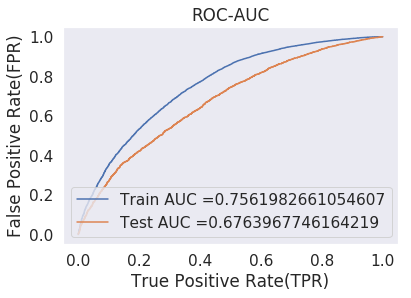

In [113]:
 #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

model = RandomForestClassifier(max_depth = 5, n_estimators = 250)

model.fit(tfidf_train,y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_scores = model.predict_proba(tfidf_train)[:,1]
y_test_scores= model.predict_proba(tfidf_test)[:,1]
y_test_pred= model.predict(tfidf_test)



train_fpr, train_tpr, train_threshold = roc_curve(y_train,y_train_scores)
test_fpr, test_tpr, test_threshold = roc_curve(y_test, y_test_scores)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC-AUC")
plt.grid()
plt.show()

### c) Confusion Matrix

#### Train Data

In [114]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4725773151290087 for threshold 0.843
[[ 3836  1950]
 [ 9108 22606]]


the maximum value of tpr*(1-fpr) 0.4725773151290087 for threshold 0.843


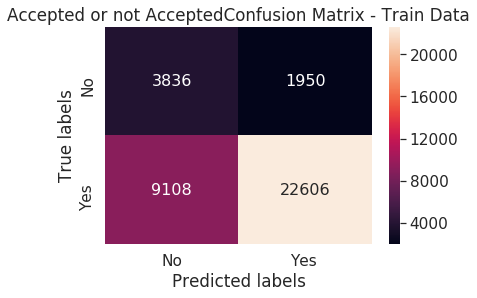

In [115]:
#http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Train Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);


plt.show()

#### Test Data

In [116]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.38824203682160496 for threshold 0.85
[[1622  306]
 [6658 3914]]


the maximum value of tpr*(1-fpr) 0.38824203682160496 for threshold 0.85


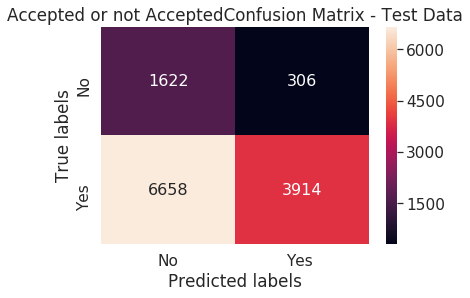

In [117]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Test Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);

##  9.1.3  Applying Random Forests on  (AVG W2V)

In [118]:
w2v_train = np.hstack ((price_standardized_train_data,previous_projects_standardized_train_data, quantity_standardized_train_data, Title_Word_Count_train_data, Essay_Word_Count_train_data, positive_score_train_data, negative_score_train_data, neutral_score_train_data, Compound_score_train_data,  cat_train_feature_responseCoding, sub_categories_train_feature_responseCoding, school_state_train_feature_responseCoding, project_grade_category_train_feature_responseCoding, teacher_prefix_category_train_feature_responseCoding, sent_vectors_train,title_vectors_train))

In [119]:
w2v_test=np.hstack((price_standardized_test_data,previous_projects_standardized_test_data, quantity_standardized_test_data, Title_Word_Count_test_data, Essay_Word_Count_test_data, positive_score_test_data,  negative_score_test_data, neutral_score_test_data, Compound_score_test_data, cat_test_feature_responseCoding, sub_categories_test_feature_responseCoding,  school_state_test_feature_responseCoding, project_grade_category_test_feature_responseCoding,  teacher_prefix_category_test_feature_responseCoding, sent_vectors_test,title_vectors_test))


In [120]:
print("Final Shape of the Data matrix")
print(w2v_train.shape, y_train.shape)

print(w2v_test.shape, y_test.shape)

Final Shape of the Data matrix
(37500, 619) (37500,)
(12500, 619) (12500,)


### A. Find the best hyper parameter which results in the maximum AUC value

-- Grid Parameter Search via 3-fold CV
{'max_depth': 5, 'n_estimators': 250}


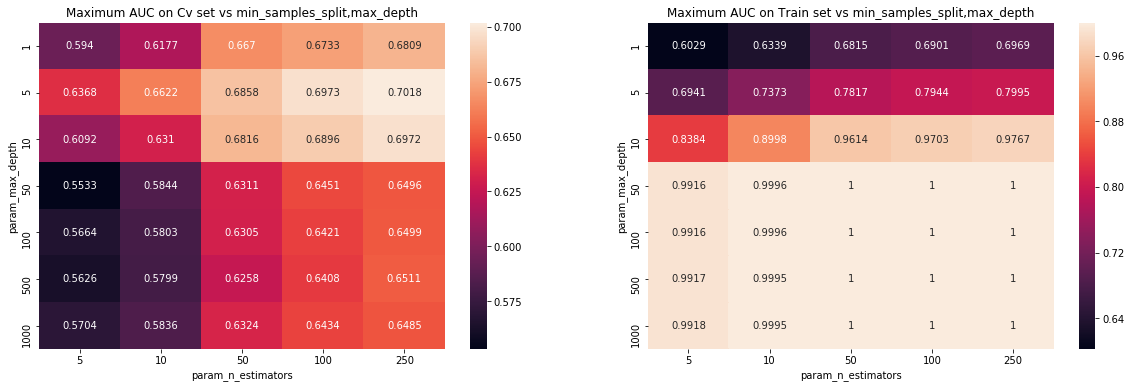

In [106]:
# https://stackoverflow.com/questions/19018333/gridsearchcv-on-logisticregression-in-scikit-learn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("-- Grid Parameter Search via 3-fold CV")

# set of parameters to test
param_grid = {
              'max_depth': [1, 5, 10, 50, 100, 500, 1000],
              'n_estimators': [5, 10, 50, 100, 250]
              
              }

dt = RandomForestClassifier()
clf = GridSearchCV( dt, param_grid, cv=3,scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(w2v_train,y_train)

print(clf.best_params_)


train_auc= clf.cv_results_['mean_train_score']
#train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
#cv_auc_std= clf.cv_results_['std_test_score']

#reference:https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
df_gridsearch = pd.DataFrame(clf.cv_results_)
max_scores = df_gridsearch.groupby([ 'param_max_depth','param_n_estimators']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title("Maximum AUC on Cv set vs min_samples_split,max_depth")


plt.subplot(1, 2, 2)
sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title("Maximum AUC on Train set vs min_samples_split,max_depth")
plt.show()

### B] Train model using the best hyper-parameter value

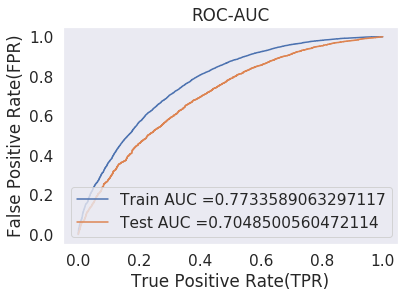

In [121]:
 #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

model = RandomForestClassifier(max_depth = 5, n_estimators = 250)

model.fit(w2v_train,y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_scores = model.predict_proba(w2v_train)[:,1]
y_test_scores= model.predict_proba(w2v_test)[:,1]
y_test_pred= model.predict(w2v_test)



train_fpr, train_tpr, train_threshold = roc_curve(y_train,y_train_scores)
test_fpr, test_tpr, test_threshold = roc_curve(y_test, y_test_scores)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC-AUC")
plt.grid()
plt.show()

### C) Confusion Matrix

#### Train Data

In [122]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.49385633145669067 for threshold 0.838
[[ 3938  1848]
 [ 8702 23012]]


the maximum value of tpr*(1-fpr) 0.49385633145669067 for threshold 0.838


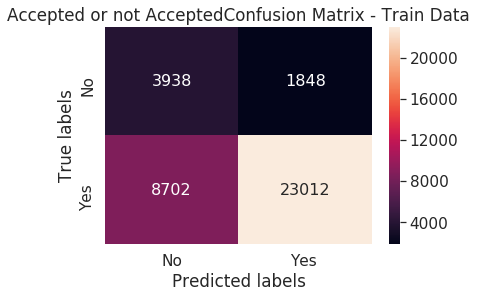

In [123]:
#http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Train Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);


plt.show()

#### Test Data

In [124]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4224621367332168 for threshold 0.86
[[1623  305]
 [6557 4015]]


the maximum value of tpr*(1-fpr) 0.4224621367332168 for threshold 0.86


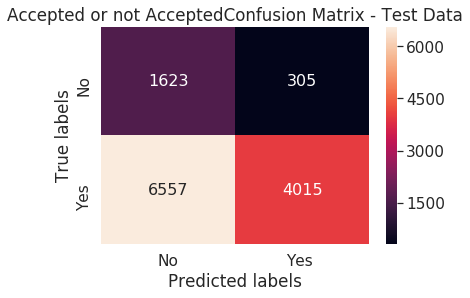

In [125]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Test Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);

## 9.1.4  Applying Random Forest On  (TFIDF W2V)


In [126]:
tfidf_w2v_train =np.hstack ((price_standardized_train_data,previous_projects_standardized_train_data, quantity_standardized_train_data, Title_Word_Count_train_data, Essay_Word_Count_train_data, positive_score_train_data, negative_score_train_data, neutral_score_train_data, Compound_score_train_data,  cat_train_feature_responseCoding, sub_categories_train_feature_responseCoding, school_state_train_feature_responseCoding, project_grade_category_train_feature_responseCoding, teacher_prefix_category_train_feature_responseCoding, tfidf_w2v_essay_train,tfidf_w2v_title_train))


In [127]:
tfidf_w2v_test=np.hstack((price_standardized_test_data,previous_projects_standardized_test_data, quantity_standardized_test_data, Title_Word_Count_test_data, Essay_Word_Count_test_data, positive_score_test_data,  negative_score_test_data, neutral_score_test_data, Compound_score_test_data, cat_test_feature_responseCoding, sub_categories_test_feature_responseCoding,  school_state_test_feature_responseCoding, project_grade_category_test_feature_responseCoding,  teacher_prefix_category_test_feature_responseCoding, tfidf_w2v_essay_test,tfidf_w2v_title_test
))


In [128]:
print("Final Shape of the Data matrix")
print(tfidf_w2v_train.shape, y_train.shape)

print(tfidf_w2v_test.shape, y_test.shape)

Final Shape of the Data matrix
(37500, 619) (37500,)
(12500, 619) (12500,)


### A. Find the best hyper parameter which results in the maximum AUC value

-- Grid Parameter Search via 3-fold CV


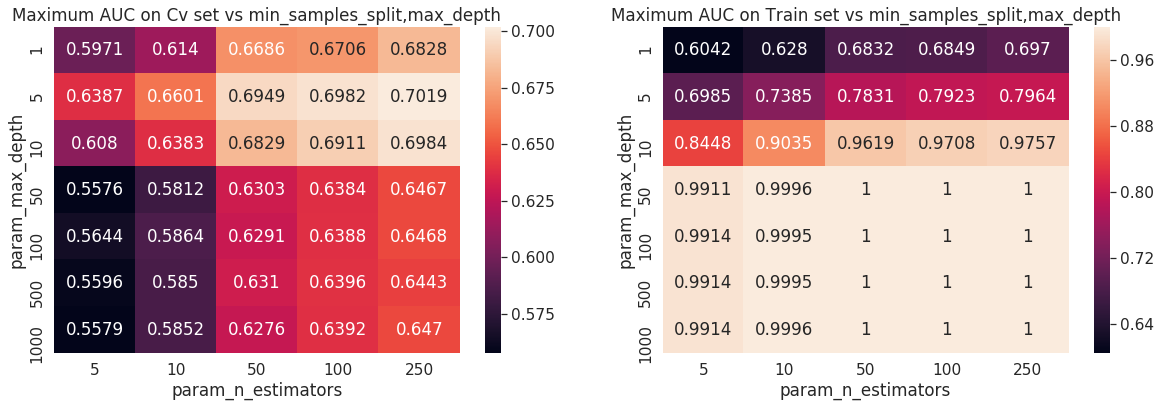

In [130]:
# https://stackoverflow.com/questions/19018333/gridsearchcv-on-logisticregression-in-scikit-learn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("-- Grid Parameter Search via 3-fold CV")

# set of parameters to test
param_grid = {
              'max_depth': [1, 5, 10, 50, 100, 500, 1000],
              'n_estimators': [5, 10, 50, 100, 250]
              
              }

dt = RandomForestClassifier()
clf = GridSearchCV( dt, param_grid, cv=3,scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(tfidf_w2v_train,y_train)




train_auc= clf.cv_results_['mean_train_score']
#train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
#cv_auc_std= clf.cv_results_['std_test_score']

#reference:https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
df_gridsearch = pd.DataFrame(clf.cv_results_)
max_scores = df_gridsearch.groupby([ 'param_max_depth','param_n_estimators']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title("Maximum AUC on Cv set vs min_samples_split,max_depth")


plt.subplot(1, 2, 2)
sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title("Maximum AUC on Train set vs min_samples_split,max_depth")
plt.show()

### B] Train model using the best hyper-parameter value

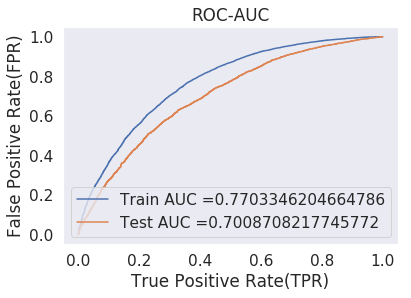

In [129]:
 #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

model = RandomForestClassifier(max_depth = 5, n_estimators = 250)

model.fit(tfidf_w2v_train,y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_scores = model.predict_proba(tfidf_w2v_train)[:,1]
y_test_scores= model.predict_proba(tfidf_w2v_test)[:,1]
y_test_pred= model.predict(w2v_test)



train_fpr, train_tpr, train_threshold = roc_curve(y_train,y_train_scores)
test_fpr, test_tpr, test_threshold = roc_curve(y_test, y_test_scores)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC-AUC")
plt.grid()
plt.show()

### D) Confusion Matrix

#### Train Data

In [130]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4933753867988092 for threshold 0.834
[[ 3862  1924]
 [ 8272 23442]]


the maximum value of tpr*(1-fpr) 0.4933753867988092 for threshold 0.834


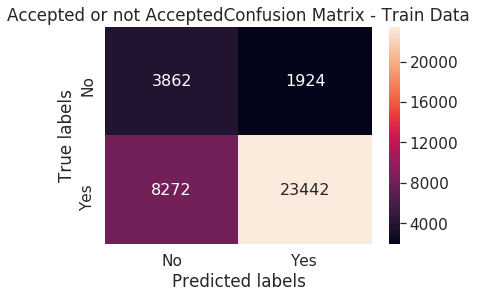

In [131]:
#http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Train Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);


plt.show()

#### Test Data

In [132]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4224916714157652 for threshold 0.862
[[1656  272]
 [6837 3735]]


the maximum value of tpr*(1-fpr) 0.4224916714157652 for threshold 0.862


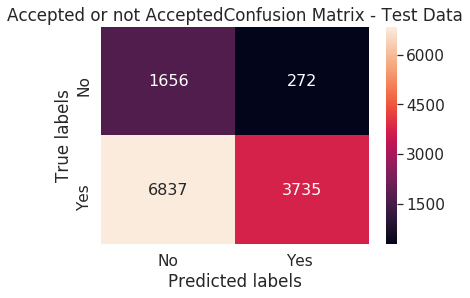

In [133]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Test Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);

# Task-2

# 9.2 Applying GBDT


## 9.2.1 Applying XGBOOST on BOW,

### A. Find the best hyper parameter which results in the maximum AUC value

-- Grid Parameter Search via 3-fold CV


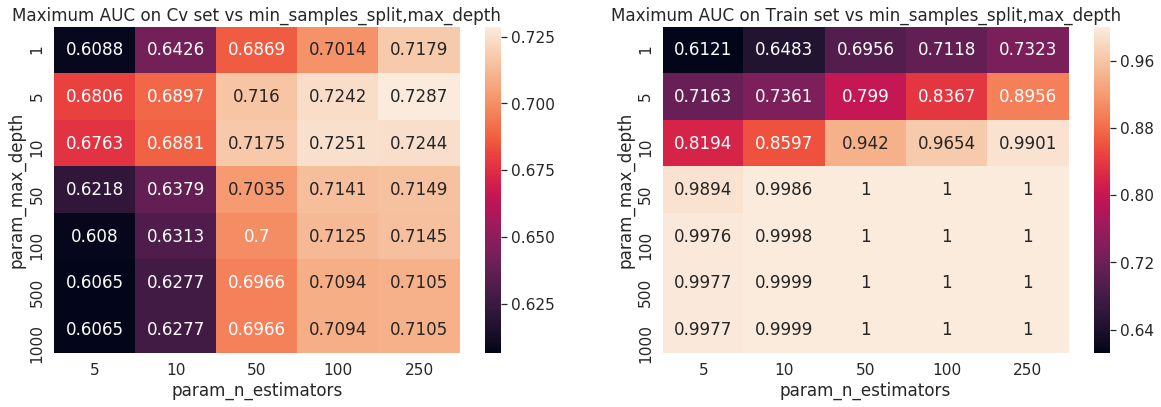

In [140]:
# https://stackoverflow.com/questions/19018333/gridsearchcv-on-logisticregression-in-scikit-learn
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("-- Grid Parameter Search via 3-fold CV")

# set of parameters to test
param_grid = {
              'max_depth': [1, 5, 10, 50, 100, 500, 1000],
              'n_estimators': [5, 10, 50, 100, 250]
              
              }

dt = XGBClassifier()
clf = GridSearchCV( dt, param_grid, cv=3,scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(bow_train,y_train)




train_auc= clf.cv_results_['mean_train_score']
#train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
#cv_auc_std= clf.cv_results_['std_test_score']

#reference:https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
df_gridsearch = pd.DataFrame(clf.cv_results_)
max_scores = df_gridsearch.groupby([ 'param_max_depth','param_n_estimators']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title("Maximum AUC on Cv set vs min_samples_split,max_depth")


plt.subplot(1, 2, 2)
sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title("Maximum AUC on Train set vs min_samples_split,max_depth")
plt.show()

### B] Train model using the best hyper-parameter value

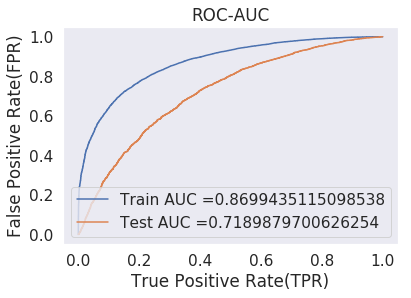

In [135]:
 #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

model = XGBClassifier(max_depth = 5, n_estimators = 250)

model.fit(bow_train,y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_scores = model.predict_proba(bow_train)[:,1]
y_test_scores= model.predict_proba(bow_test)[:,1]
y_test_pred= model.predict(bow_test)



train_fpr, train_tpr, train_threshold = roc_curve(y_train,y_train_scores)
test_fpr, test_tpr, test_threshold = roc_curve(y_test, y_test_scores)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC-AUC")
plt.grid()
plt.show()

### C) Confusion Matrix

#### Train Data

In [136]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.6187970308256031 for threshold 0.822
[[ 4585  1201]
 [ 6949 24765]]


the maximum value of tpr*(1-fpr) 0.6187970308256031 for threshold 0.822


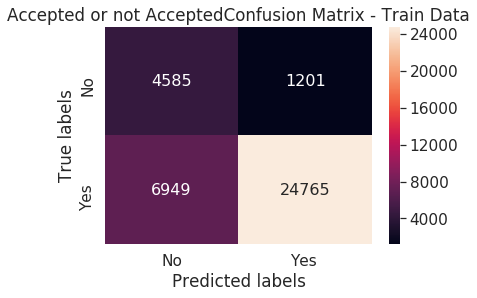

In [137]:
#http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Train Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);


plt.show()

#### Test Data

In [138]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4420723809703232 for threshold 0.879
[[1452  476]
 [4667 5905]]


the maximum value of tpr*(1-fpr) 0.4420723809703232 for threshold 0.879


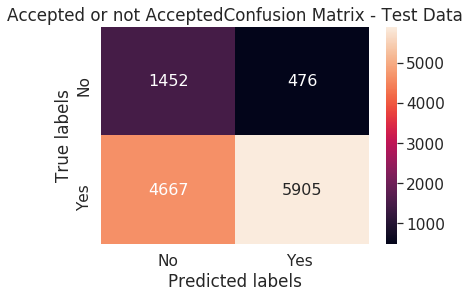

In [139]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Test Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);

## 9.2.2 Applying XGBOOST on TFIDF,

### A. Find the best hyper parameter which results in the maximum AUC value

-- Grid Parameter Search via 3-fold CV
{'max_depth': 5, 'n_estimators': 250}


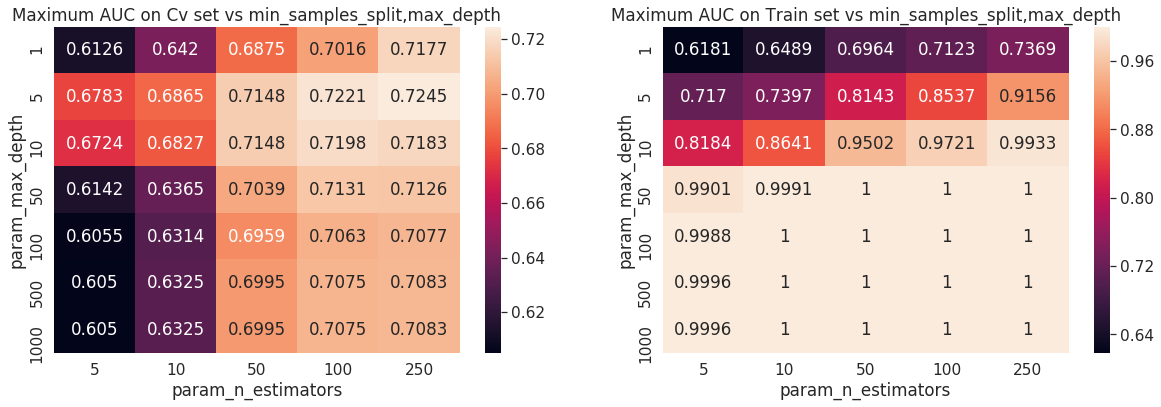

In [147]:

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("-- Grid Parameter Search via 3-fold CV")

# set of parameters to test
param_grid = {
              'max_depth': [1, 5, 10, 50, 100, 500, 1000],
              'n_estimators': [5, 10, 50, 100, 250]
              
              }

dt = XGBClassifier()
clf = GridSearchCV( dt, param_grid, cv=3,scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(tfidf_train,y_train)

print(clf.best_params_)


train_auc= clf.cv_results_['mean_train_score']
#train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
#cv_auc_std= clf.cv_results_['std_test_score']

#reference:https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
df_gridsearch = pd.DataFrame(clf.cv_results_)
max_scores = df_gridsearch.groupby([ 'param_max_depth','param_n_estimators']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title("Maximum AUC on Cv set vs min_samples_split,max_depth")


plt.subplot(1, 2, 2)
sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title("Maximum AUC on Train set vs min_samples_split,max_depth")
plt.show()

### B. Train model using the best hyper-parameter value

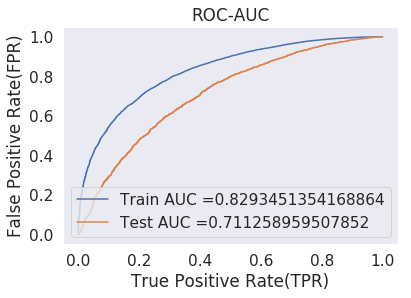

In [140]:
 #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import roc_auc_score

model = XGBClassifier(max_depth = 5, n_estimators = 100)

model.fit(tfidf_train,y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_scores = model.predict_proba(tfidf_train)[:,1]
y_test_scores= model.predict_proba(tfidf_test)[:,1]
y_test_pred= model.predict(tfidf_test)



train_fpr, train_tpr, train_threshold = roc_curve(y_train,y_train_scores)
test_fpr, test_tpr, test_threshold = roc_curve(y_test, y_test_scores)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC-AUC")
plt.grid()
plt.show()

### C) Confusion Matrix

#### Train Data

In [141]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.5616392716261769 for threshold 0.836
[[ 4438  1348]
 [ 8492 23222]]


the maximum value of tpr*(1-fpr) 0.5616392716261769 for threshold 0.836


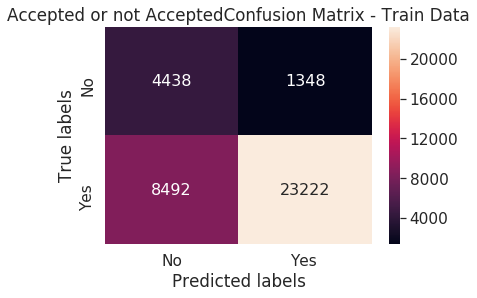

In [142]:
#http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Train Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);


plt.show()

#### Test Data

In [143]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4302718034642514 for threshold 0.888
[[1548  380]
 [5580 4992]]


the maximum value of tpr*(1-fpr) 0.4302718034642514 for threshold 0.888


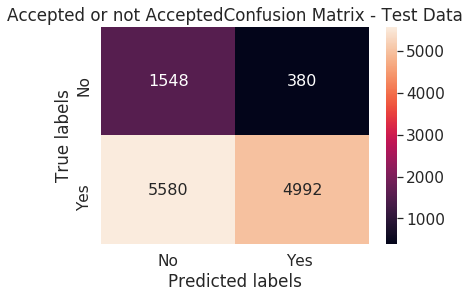

In [144]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Test Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);

## 9.2.3 Applying XGBOOST on AVG W2V,

### A. Find the best hyper parameter which results in the maximum AUC value

-- Grid Parameter Search via 3-fold CV
{'n_estimators': 100, 'max_depth': 5}


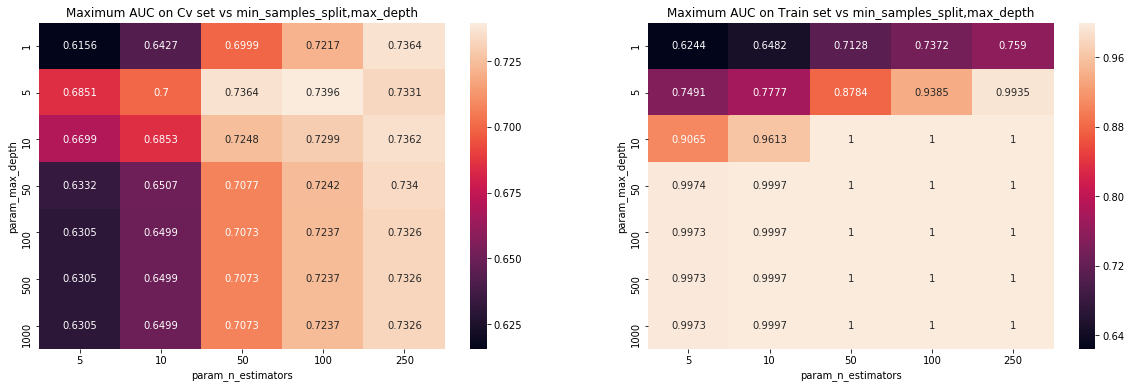

In [106]:
# https://stackoverflow.com/questions/19018333/gridsearchcv-on-logisticregression-in-scikit-learn
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("-- Grid Parameter Search via 3-fold CV")

# set of parameters to test
param_grid = {
              'max_depth': [1, 5, 10, 50, 100, 500, 1000],
              'n_estimators': [5, 10, 50, 100, 250]
              
              }

dt = XGBClassifier()
clf = GridSearchCV( dt, param_grid, cv=3,scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(w2v_train,y_train)

print(clf.best_params_)


train_auc= clf.cv_results_['mean_train_score']
#train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
#cv_auc_std= clf.cv_results_['std_test_score']

#reference:https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
df_gridsearch = pd.DataFrame(clf.cv_results_)
max_scores = df_gridsearch.groupby([ 'param_max_depth','param_n_estimators']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title("Maximum AUC on Cv set vs min_samples_split,max_depth")


plt.subplot(1, 2, 2)
sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title("Maximum AUC on Train set vs min_samples_split,max_depth")
plt.show()

### B. Train model using the best hyper-parameter value

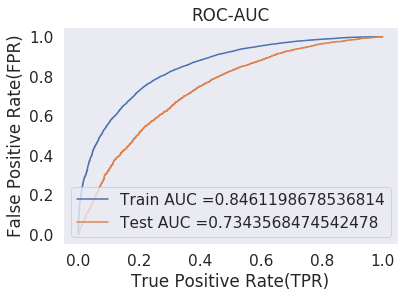

In [145]:
 #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

model = XGBClassifier(max_depth = 5, n_estimators = 50)

model.fit(w2v_train,y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_scores = model.predict_proba(w2v_train)[:,1]
y_test_scores= model.predict_proba(w2v_test)[:,1]
y_test_pred= model.predict(w2v_test)



train_fpr, train_tpr, train_threshold = roc_curve(y_train,y_train_scores)
test_fpr, test_tpr, test_threshold = roc_curve(y_test, y_test_scores)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC-AUC")
plt.grid()
plt.show()

### C) Confusion Matrix

#### Train Data

In [146]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.5881048955928506 for threshold 0.833
[[ 4468  1318]
 [ 7561 24153]]


the maximum value of tpr*(1-fpr) 0.5881048955928506 for threshold 0.833


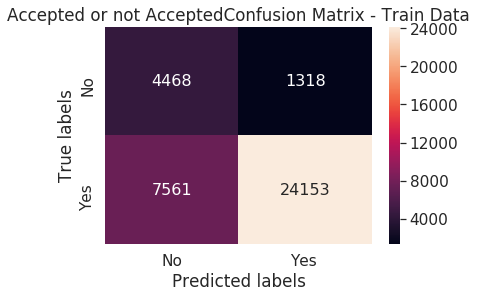

In [147]:
#http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Train Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);


plt.show()

#### Test Data

In [148]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.45666334818505944 for threshold 0.886
[[1575  353]
 [5478 5094]]


the maximum value of tpr*(1-fpr) 0.45666334818505944 for threshold 0.886


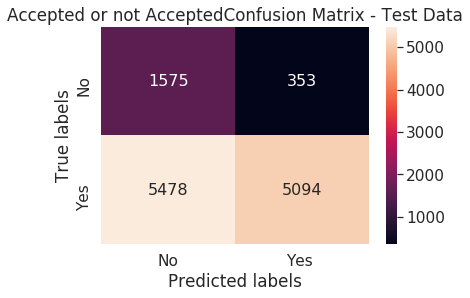

In [149]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Test Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);

## 9.2.4 Applying XGBOOST on TFIDF W2V,

### A. Find the best hyper parameter which results in the maximum AUC value

-- Grid Parameter Search via 3-fold CV


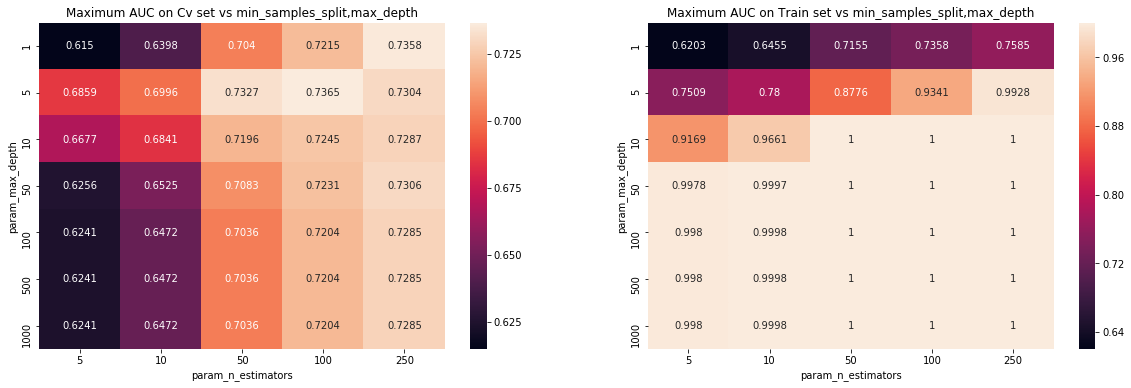

In [103]:
# https://stackoverflow.com/questions/19018333/gridsearchcv-on-logisticregression-in-scikit-learn
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("-- Grid Parameter Search via 3-fold CV")

# set of parameters to test
param_grid = {
              'max_depth': [1, 5, 10, 50, 100, 500, 1000],
              'n_estimators': [5, 10, 50, 100, 250]
              
              }

dt = XGBClassifier()
clf = GridSearchCV( dt, param_grid, cv=3,scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(tfidf_w2v_train,y_train)




train_auc= clf.cv_results_['mean_train_score']
#train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
#cv_auc_std= clf.cv_results_['std_test_score']

#reference:https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
df_gridsearch = pd.DataFrame(clf.cv_results_)
max_scores = df_gridsearch.groupby([ 'param_max_depth','param_n_estimators']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title("Maximum AUC on Cv set vs min_samples_split,max_depth")


plt.subplot(1, 2, 2)
sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title("Maximum AUC on Train set vs min_samples_split,max_depth")
plt.show()

### B. Train model using the best hyper-parameter value

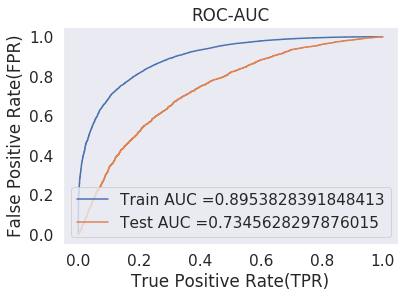

In [150]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import roc_auc_score

model = XGBClassifier(max_depth = 5, n_estimators = 100)

model.fit(tfidf_w2v_train,y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_scores = model.predict_proba(tfidf_w2v_train)[:,1]
y_test_scores= model.predict_proba(tfidf_w2v_test)[:,1]
y_test_pred= model.predict(tfidf_w2v_test)



train_fpr, train_tpr, train_threshold = roc_curve(y_train,y_train_scores)
test_fpr, test_tpr, test_threshold = roc_curve(y_test, y_test_scores)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC-AUC")
plt.grid()
plt.show()

### C) Confusion Matrix

#### Train Data

In [151]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.6537168435547389 for threshold 0.825
[[ 4743  1043]
 [ 6423 25291]]


the maximum value of tpr*(1-fpr) 0.6537168435547389 for threshold 0.825


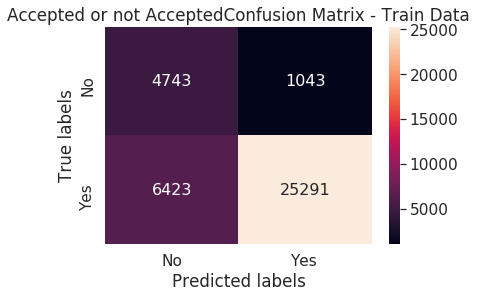

In [152]:
#http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Train Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);


plt.show()

#### Test Data

In [153]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4603407105279271 for threshold 0.879
[[1478  450]
 [4566 6006]]


the maximum value of tpr*(1-fpr) 0.4603407105279271 for threshold 0.879


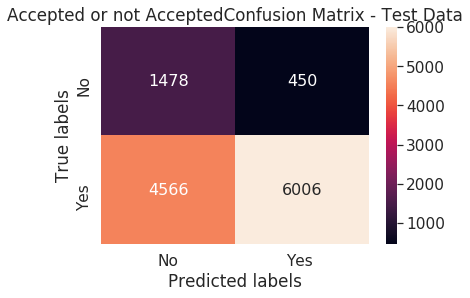

In [154]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

ax= plt.subplot()

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',ax=ax);# font size

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accepted or not AcceptedConfusion Matrix - Test Data'); 
ax.xaxis.set_ticklabels([ 'No', 'Yes ']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);

## Conclusion

In [114]:
 #Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable


x = PrettyTable()
x.field_names = ["Vectorizer Used", "Model","HP-1(max_depth)","HP-2(n_estimators)","AUC-Score"]

x.add_row(["BOW", "Random Forests", 10,250, 0.69])

x.add_row(["TFIDF", "Random Forests",5,250, 0.67])

x.add_row(["AVG W2V", "Random Forests", 5,250, 0.70])

x.add_row(["TFIDF W2V", "Random Forests", 5,250, 0.70])

x.add_row(["BOW", "XGBOOST", 5,250, 0.71])

x.add_row(["TFIDF", "XGBOOST", 5,100, 0.71])

x.add_row(["AVG W2V", "XGBOOST", 5,50, 0.7343])

x.add_row(["TFIDF W2V", "XGBOOST", 5,100, 0.7345])





print(x)

+-----------------+----------------+-----------------+--------------------+-----------+
| Vectorizer Used |     Model      | HP-1(max_depth) | HP-2(n_estimators) | AUC-Score |
+-----------------+----------------+-----------------+--------------------+-----------+
|       BOW       | Random Forests |        10       |        250         |    0.69   |
|      TFIDF      | Random Forests |        5        |        250         |    0.67   |
|     AVG W2V     | Random Forests |        5        |        250         |    0.7    |
|    TFIDF W2V    | Random Forests |        5        |        250         |    0.7    |
|       BOW       |    XGBOOST     |        5        |        250         |    0.71   |
|      TFIDF      |    XGBOOST     |        5        |        100         |    0.71   |
|     AVG W2V     |    XGBOOST     |        5        |         50         |   0.7343  |
|    TFIDF W2V    |    XGBOOST     |        5        |        100         |   0.7345  |
+-----------------+-------------

As it can be seen from the above table, that the model is performing better than random model, from all the sets, TFIDF W2V is working fairly well having AUC score of 0.7345 for XGBOOST is the highest

1. I splitted the dataset into train, cv and test dataset
2. Preprocessed all the text fetaures
3. Vectorized all the text, categorical and numerical features, for text i used BOW & TFIDF
4. Merged all features using hstack as instructed
5. Using train dataset, i plotted my AUC curve using GridSearchCV using 3Fold Cross Validation for both categories
6. From AUC curve, i picked best alpha. using best alpha, i plotted ROC curve on train and test data.
7. Then i plotted my confusion matrix for both the sets.
8. Atlast you can see my result in tabular format.
9. I repeat the above steps for XGBOOST as well, not much diference is ther between results of RF & XGBOOST, XGBOOST took more computation time, and the results of XGBOOST are slightly better.
10.  I used RESPONSE CODING for vectorization of categorical data, wrote my own function for it.